In [19]:
import tensorflow as tf
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [2]:
#split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


(28, 28)

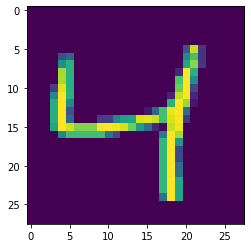

In [11]:
#displaying one of the images in the dataset and checking its shape
plt.imshow(X_train[2])
X_train[2].shape  

In [17]:
#reshaping the data to fit the model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [20]:
#one hot encoding the target variable so that we can indentify the number from the array using the index
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [30]:
#training the model
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu', input_shape = [28,28,1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#flattening
cnn.add(tf.keras.layers.Flatten())
#full connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
#output layer
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [31]:
# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(X_train,y_train, validation_data = (X_test, y_test), epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0406 - accuracy: 0.9560 - val_loss: 0.0112 - val_accuracy: 0.9842
Epoch 2/3
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0118 - accuracy: 0.9849 - val_loss: 0.0089 - val_accuracy: 0.9872
Epoch 3/3
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0089 - accuracy: 0.9879 - val_loss: 0.0097 - val_accuracy: 0.9861


In [33]:
#predictions for the first few images in the dataset
cnn.predict(X_test[:6])

1/1 [==============================] - 2s 2s/step


array([[1.02392857e-16, 2.57132832e-17, 5.99560710e-15, 3.47566121e-15,
        2.21789695e-13, 4.57238422e-15, 7.21962705e-14, 1.00000000e+00,
        1.03037620e-12, 4.42405715e-14],
       [9.90109145e-14, 4.72303454e-16, 1.00000000e+00, 8.64866366e-17,
        1.47043543e-16, 8.28427174e-19, 1.01194315e-13, 8.21291616e-17,
        1.22128310e-14, 5.05120778e-18],
       [5.57495499e-12, 1.00000000e+00, 3.97042598e-12, 1.20208815e-13,
        3.92580524e-10, 8.75821915e-11, 3.86678294e-11, 2.08058304e-09,
        5.40705591e-10, 5.10767101e-14],
       [1.00000000e+00, 3.89732134e-17, 4.59862964e-12, 4.71069433e-11,
        3.73329704e-14, 1.94321347e-11, 4.88856559e-11, 1.65032575e-15,
        2.10161763e-13, 5.45456895e-14],
       [1.22597889e-14, 2.70408323e-14, 4.36130421e-14, 2.07029287e-18,
        1.00000000e+00, 2.15375406e-14, 2.15641979e-12, 8.46757496e-18,
        3.30279125e-13, 1.08186958e-13],
       [6.69599304e-13, 1.00000000e+00, 1.47225700e-12, 3.43234081e-14,
   

In [34]:
#actual results of those images
y_test[:6]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)